# Lesson 6 Assignment
### Jessica Kunkel

As usual, I run the shebang line first, and initialize my environment to use the correct path. I import NumPy, pandas, and matplotlib. I then import the mtcars dataset.

In [5]:
#!/usr/bin/env python
""" Import display functions and create a function to print outputs to 
Markdown """

from IPython.display import display, Markdown
def printmd(string):
    display(Markdown(string))

In [6]:
""" Import the os module and set the working directory to where the 
mtcars.csv file is saved """

import os
path = r"C:\Users\jkunk\OneDrive\Documents\_SWENG Masters\9 DAAN 862 - Analytics Programming Python"
os.chdir(path)

In [7]:
""" Import NumPy, pandas, and dataframe """
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [9]:
mtcars = pd.read_csv('mtcars.csv')

### 1. Plot am-based histogram to compare mpg

To plot a transmission-based (automatic vs manual) histogram to compare mpg, I first sorted the mpg values into two categories based on their transmission. I used conditions and Boolean indexing to create the categories. I then plotted each histogram on the same figure, adjusting the opacity and color so that both groups were visible at once. I also used 5 bins for each category to make the graph less disjointed (not binning created empty space along the x-axis where there were no cars that had a given mpg). I labeled the graph and added a legend. 

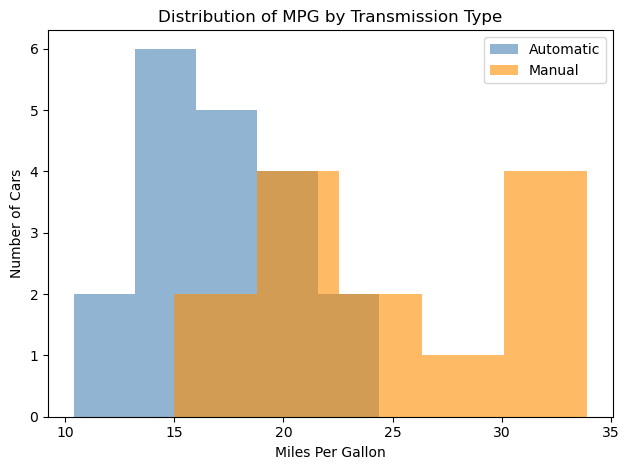

In [58]:
# create conditions: automatic ('am' = 0) or manual ('am' = 1) 
cond_a = mtcars['am'] == 0
cond_m = mtcars['am'] == 1

# Boolean indexing to group mpg by transmission
vals_a = mtcars['mpg'][cond_a]
vals_m = mtcars['mpg'][cond_m]

# plot histogram for automatic and manual using mpg values, set labels, opacity, and colors
plt.hist(vals_a, bins=5, alpha=0.6, label='Automatic', color='steelblue')
plt.hist(vals_m, bins=5, alpha=0.6, label='Manual', color='darkorange')

# label the figure
plt.xlabel('Miles Per Gallon')
plt.ylabel('Number of Cars')
plt.title('Distribution of MPG by Transmission Type')
plt.legend()
plt.tight_layout()

From the graph, you can see that manual transmission has a range of approximately 15-35 miles per gallon, with 4 cars falling between 30 and 35 mpg. Automatic transmission, on the other hand, has a range of approximately 10-25 miles per gallon, with the most cars falling around 15 to 20 mpg. Overall, cars with manual transmission appear to achieve a higher mileage per gallon.

### 2. Use scatterplot to plot mpg VS. hp

I chose to use the `scatter` function with horsepower on the x-axis and miles per gallon on the x-axis. There was not as much manipulation of the data that went into this task. 

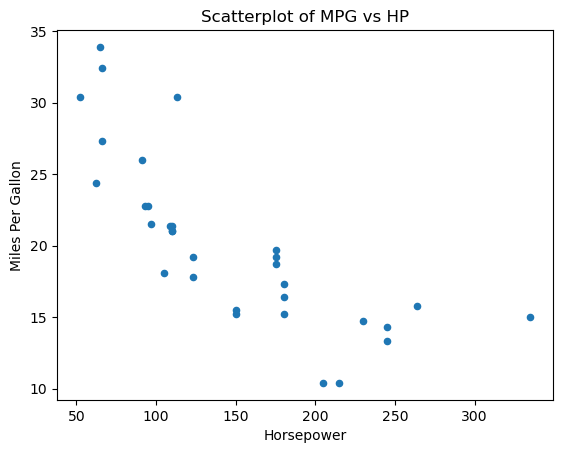

In [104]:
plt.scatter(x=mtcars.hp, y=mtcars.mpg, s=20)

# label the figure
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.title('Scatterplot of MPG vs HP')
plt.show()

From the graph above, you can see that cars with higher horsepower tend to have a lower mpg value, while cars with a lower horsepower are able to have a higher mpg. Not all cars with lower horsepower (below 200hp) have a higher mpg. However, all the cars sampled with mpg higher than 25 have less than 150hp. 

### 3. Create a scatterplot matrix for new data consisting of columns [disp, hp, drat, wt, qsect].

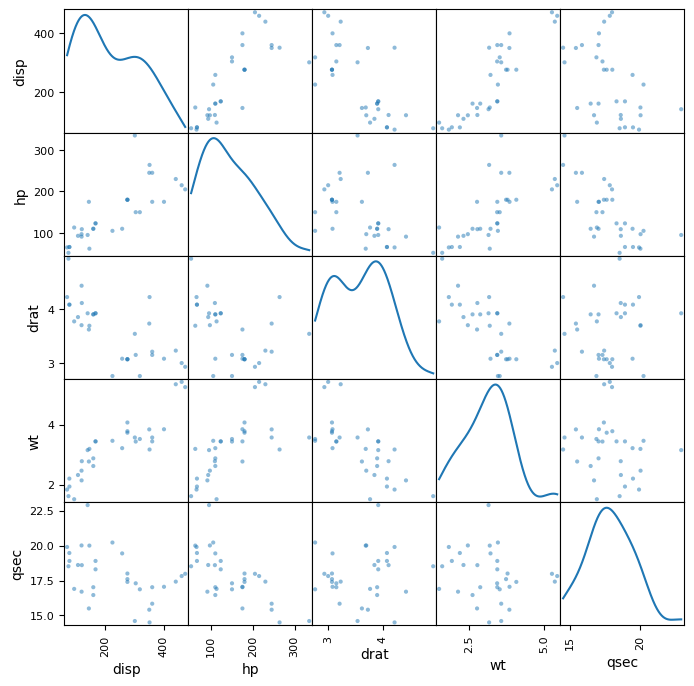

In [149]:
mtcars_new = mtcars[['disp', 'hp', 'drat', 'wt', 'qsec']]

pd.plotting.scatter_matrix(mtcars_new, diagonal='kde', figsize=[8,8])

plt.show()

Visually inspecting the graphs in the scatterplot matrix, it does not look like there are many correlations to be made or conclusions to be drawn. There appears to be a positive correlation between weight and displacement, as well as between horsepower and displacement.

The Kernel Density Estimates through the diagonal of the matrix show the central tendency for each attribute. The displacement attribute has its peak around 100 cubic inches, and a second, smaller peak around 300 cubic inches. The horsepower attribute has its peak around 100hp. The rear axle ratio has two peaks, the first around 3 and the second around 4. The weight has a peak around 3 to 3.5 thousand pounds. The quarter-second time has its peak around 18 seconds.  

### 4. Create boxplots for new data consisting of columns [disp, hp, drat, wt, qsect]. 

After trying having each boxplot on the same graph, I realized that the scales of the measurements were not similar enough for a combined boxplot to be useful. Therefore, I decided to use a subplot mosaic to show individual boxplots for each attribute listed in the problem statement.

Text(0.5, 1.0, 'Qsec')

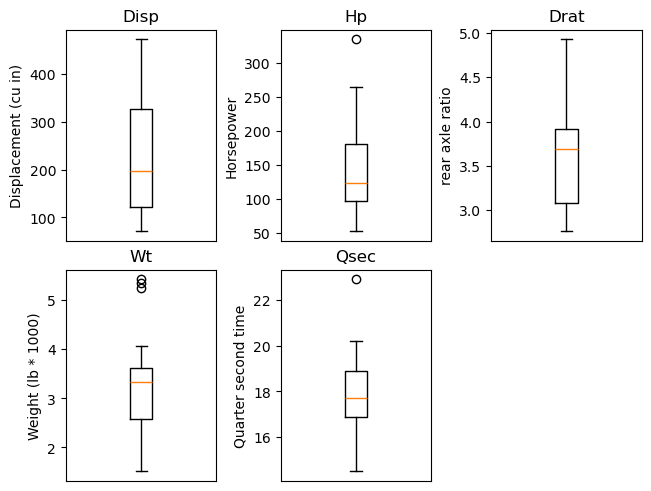

In [120]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABC
    DE.
    """
)

ax = axd['A']
ax.boxplot(x=mtcars_new['disp'])
ax.set_xticks([])
ax.set_ylabel('Displacement (cu in)')
ax.set_title('Disp')

ax = axd['B']
ax.boxplot(x=mtcars_new['hp'])
ax.set_xticks([])
ax.set_ylabel('Horsepower')
ax.set_title('Hp')

ax = axd['C']
ax.boxplot(x=mtcars_new['drat'])
ax.set_xticks([])
ax.set_ylabel('rear axle ratio')
ax.set_title('Drat')

ax = axd['D']
ax.boxplot(x=mtcars_new['wt'])
ax.set_xticks([])
ax.set_ylabel('Weight (lb * 1000)')
ax.set_title('Wt')

ax = axd['E']
ax.boxplot(x=mtcars_new['qsec'])
ax.set_xticks([])
ax.set_ylabel('Quarter second time')
ax.set_title('Qsec')

The graphs above offer insight into the distribution of each attribute.

For displacement, you can see a minimum below 100 cubic inches, first quartile around 125 cubic inches, center around 200 cubic inches, third quartile around 300-325 cubic inches, and maximum close to 500 cubic inches. 

For horsepower, you can see a minimum around 50hp, first quartile around 100hp, center around 125hp, third quartile around 175hp, maximum around 250-275 hp, and an outlier likely close to 350hp.

For rear axle ratio, you can see a minimum below 3 (likely close to 2.5), first quartile just above 3, center around 3.75, third quartile close to 4, and maximum close to 5.

For weight, you can see a minimum a little less than 1.5 thousand pounds, first quartile around 2.5 thousand pounds, center around 3.25 thousand pounds, third quartile around 3.5 thousand pounds, maximum around 4 thousand pounds, and three outliers above 5 thousand pounds.

For quarter second time, you can see a minimum likely around 14 seconds, first quartile around 17 seconds, center a little less than 18 seconds, third quartile around 19 seconds, maximum around 20 seconds, and an outlier above 22 seconds (likely close to 23 seconds).

### 5. Use plots to answer which variable has the most impact on mpg.

To get a broad view of each attribute's effect on mpg, I chose to create a subplot mosaic of scatterplots that showed each attribute on the x-axis and the mpg on the y-axis.

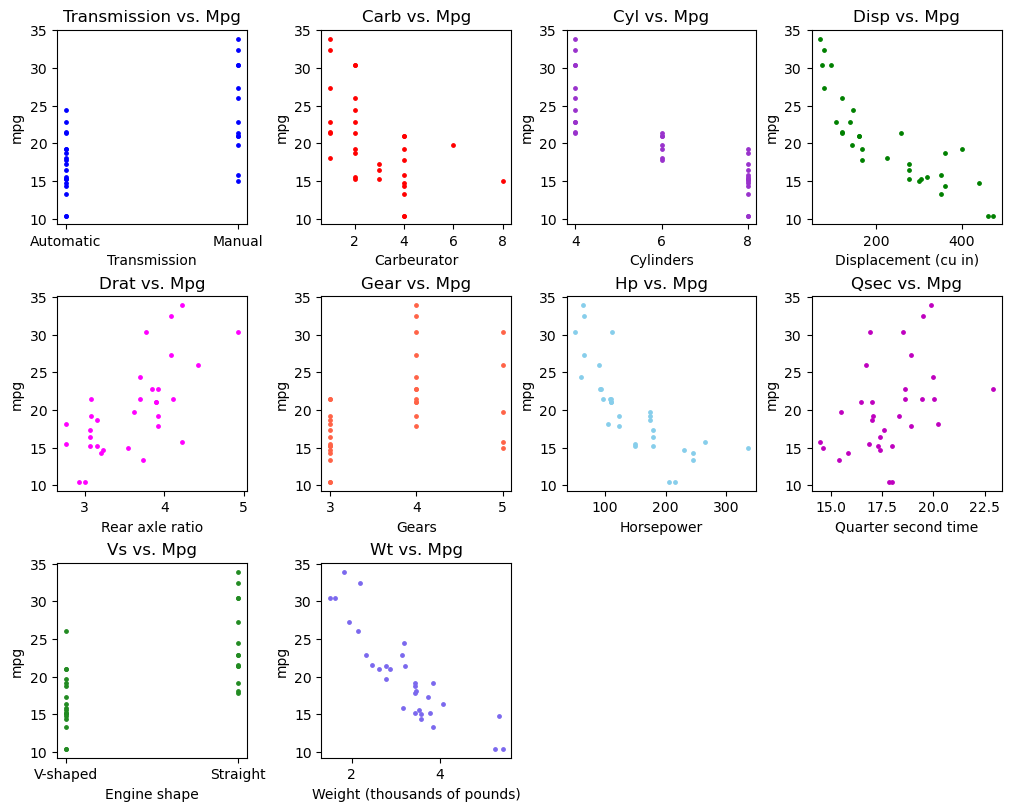

In [150]:
axd = plt.figure(figsize=[10,8], layout="constrained").subplot_mosaic(
    """
    ABCD
    EFGH
    IJ..
    """
)

ax = axd['A']
ax.scatter(x=mtcars['am'], y=mtcars['mpg'], s=6, c='blue')
ax.set_xlabel('Transmission')
ax.set_xticks([0,1], ['Automatic', 'Manual'])
ax.set_ylabel('mpg')
ax.set_title('Transmission vs. Mpg')

ax = axd['B']
ax.scatter(x=mtcars['carb'], y=mtcars['mpg'], s=6, c='red')
ax.set_xlabel('Carbeurator')
ax.set_ylabel('mpg')
ax.set_title('Carb vs. Mpg')

ax = axd['C']
ax.scatter(x=mtcars['cyl'], y=mtcars['mpg'], s=6, c='darkorchid')
ax.set_xlabel('Cylinders')
ax.set_ylabel('mpg')
ax.set_title('Cyl vs. Mpg')

ax = axd['D']
ax.scatter(x=mtcars['disp'], y=mtcars['mpg'], s=6, c='green')
ax.set_xlabel('Displacement (cu in)')
ax.set_ylabel('mpg')
ax.set_title('Disp vs. Mpg')

ax = axd['E']
ax.scatter(x=mtcars['drat'], y=mtcars['mpg'], s=6, c='magenta')
ax.set_xlabel('Rear axle ratio')
ax.set_ylabel('mpg')
ax.set_title('Drat vs. Mpg')

ax = axd['F']
ax.scatter(x=mtcars['gear'], y=mtcars['mpg'], s=6, c='tomato')
ax.set_xlabel('Gears')
ax.set_ylabel('mpg')
ax.set_title('Gear vs. Mpg')

ax = axd['G']
ax.scatter(x=mtcars['hp'], y=mtcars['mpg'], s=6, c='skyblue')
ax.set_xlabel('Horsepower')
ax.set_ylabel('mpg')
ax.set_title('Hp vs. Mpg')

ax = axd['H']
ax.scatter(x=mtcars['qsec'], y=mtcars['mpg'], s=6, c='m')
ax.set_xlabel('Quarter second time')
ax.set_ylabel('mpg')
ax.set_title('Qsec vs. Mpg')

ax = axd['I']
ax.scatter(x=mtcars['vs'], y=mtcars['mpg'], s=6, c='forestgreen')
ax.set_xlabel('Engine shape')
ax.set_xticks([0,1], ['V-shaped', 'Straight'])
ax.set_ylabel('mpg')
ax.set_title('Vs vs. Mpg')

ax = axd['J']
ax.scatter(x=mtcars['wt'], y=mtcars['mpg'], s=6, c='mediumslateblue')
ax.set_xlabel('Weight (thousands of pounds)')
ax.set_ylabel('mpg')
ax.set_title('Wt vs. Mpg')

plt.show()

Reading the scatter plots above, the graph that appears to have the tightest formation of datapoints is weight vs miles per gallon, and by extension the strongest correlation to mpg. This would suggest that of the attributes included in the mtcars dataset, weight has the strongest effect on mpg.

There are looser negative correlations between carb and mpg, disp and mpg, and hp and mpg. There are looser positive correlations between drat and mpg and between qsec and mpg. 